importing libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

loading the dataset

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

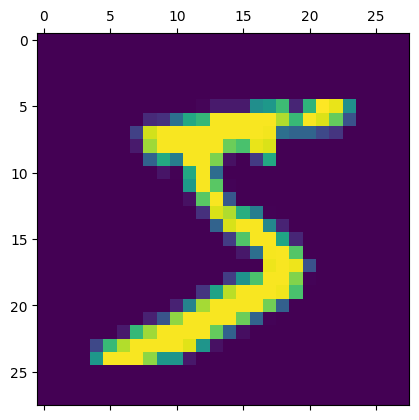

In [4]:
plt.matshow(x_train[0])

In [5]:
y_train[0]

5

one image dimentions

In [6]:
x_train[0].shape

(28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

flattern train data to 28x28

In [7]:
x_train_flatternd=x_train.reshape(len(x_train),28*28)
x_test_flatternd=x_test.reshape(len(x_test),28*28)


In [11]:
print(x_train_flatternd[0][:20])
print(x_test_flatternd.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(10000, 784)


scaling the data for training

In [17]:
x_train_flatternd=x_train_flatternd/255
x_test_flatternd=x_test_flatternd/255

In [18]:
x_train_flatternd[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

creating the model 

In [20]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x_train_flatternd,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 738us/step - loss: 0.4715 - accuracy: 0.8762
Epoch 2/7
1875/1875 [==============================] - 1s 706us/step - loss: 0.3042 - accuracy: 0.9146
Epoch 3/7
1875/1875 [==============================] - 1s 716us/step - loss: 0.2833 - accuracy: 0.9202
Epoch 4/7
1875/1875 [==============================] - 1s 710us/step - loss: 0.2729 - accuracy: 0.9227
Epoch 5/7
1875/1875 [==============================] - 1s 719us/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/7
1875/1875 [==============================] - 1s 722us/step - loss: 0.2616 - accuracy: 0.9276
Epoch 7/7
1875/1875 [==============================] - 1s 714us/step - loss: 0.2583 - accuracy: 0.9283


evaluvating the model 

In [21]:
model.evaluate(x_test_flatternd,y_test)

313/313 [==============================] - 0s 650us/step - loss: 0.2675 - accuracy: 0.9253


[0.267488956451416, 0.9253000020980835]

test predictions

In [23]:
predictions=model.predict(x_test_flatternd)

313/313 [==============================] - 0s 555us/step


In [24]:
predictions[0]

array([1.14502897e-02, 1.27008818e-07, 2.29742322e-02, 9.65073168e-01,
       1.41723978e-03, 1.08745866e-01, 2.04226382e-07, 9.99868929e-01,
       8.19339305e-02, 7.19064236e-01], dtype=float32)

In [25]:
#correct predictions
np.argmax(predictions[0])

7

In [26]:
# acctual value

In [28]:
y_test[0]

7

In [29]:
np.argmax(predictions)

60897

confusion matrix

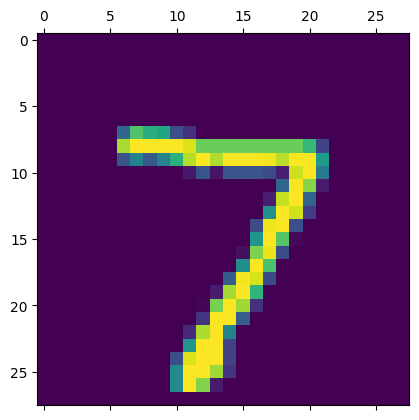

In [31]:
plt.matshow(x_test[0])

In [33]:
predicted_labels=[np.argmax(i) for i in predictions]

In [34]:
predicted_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
matrix=tf.math.confusion_matrix(labels=y_test,predictions=predicted_labels)

visualize using seaborn

Text(95.72222222222221, 0.5, 'Truth values')

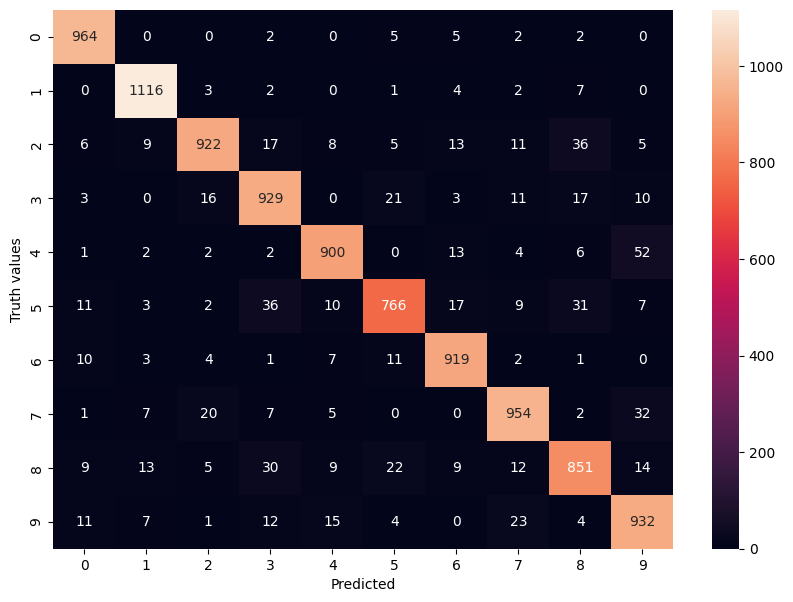

In [38]:
plt.figure(figsize=(10,7))
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth values')

saving the model 

In [40]:
import pickle

In [42]:
saved_model=pickle.dumps(model)

In [43]:
from joblib import dump, load

In [44]:
dump(model,'model.joblib')

['model.joblib']

load the model from the file

In [45]:
model_loaded=load('model.joblib')

In [49]:
predict_load_model=model_loaded.predict(x_test_flatternd)

313/313 [==============================] - 0s 558us/step


In [50]:
predict_load_model[0]

array([1.14502897e-02, 1.27008818e-07, 2.29742322e-02, 9.65073168e-01,
       1.41723978e-03, 1.08745866e-01, 2.04226382e-07, 9.99868929e-01,
       8.19339305e-02, 7.19064236e-01], dtype=float32)

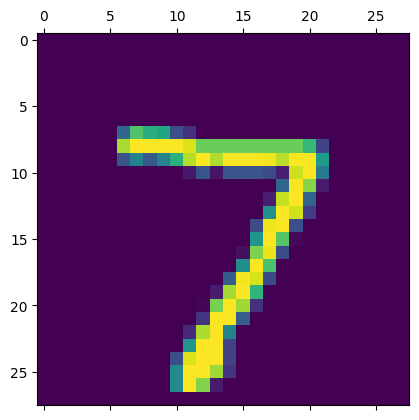

In [51]:
plt.matshow(x_test[0])

real value predicated

In [52]:
np.argmax(predict_load_model[0])

7